
# Logistic Regression on the Pima Indians Diabetes Dataset


**Dataset**: Pima Indians Diabetes
**Goal**: Build a rigorous logistic regression baseline with strong EDA, calibration, and interpretation.




# Task
Perform a comprehensive analysis on the Pima Indian Diabetes dataset, including detailed EDA, preprocessing, feature engineering, building and evaluating a Logistic Regression model, and using SHAP for explainable AI. Use the dataset from "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv".

## Load data


Load the Pima Indians Diabetes dataset from the provided URL.



Import pandas, define the URL, load the dataset, and display the head and info of the dataframe as requested.



In [25]:
import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

display(df.head())
display(df.info())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

## Detailed EDA


Perform detailed exploratory data analysis, including visualizing distributions, checking for missing values, and analyzing correlations.



Generate descriptive statistics, visualize distributions using histograms and box plots, calculate and visualize the correlation matrix, check for missing values, and analyze the target variable distribution to perform a comprehensive EDA.



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


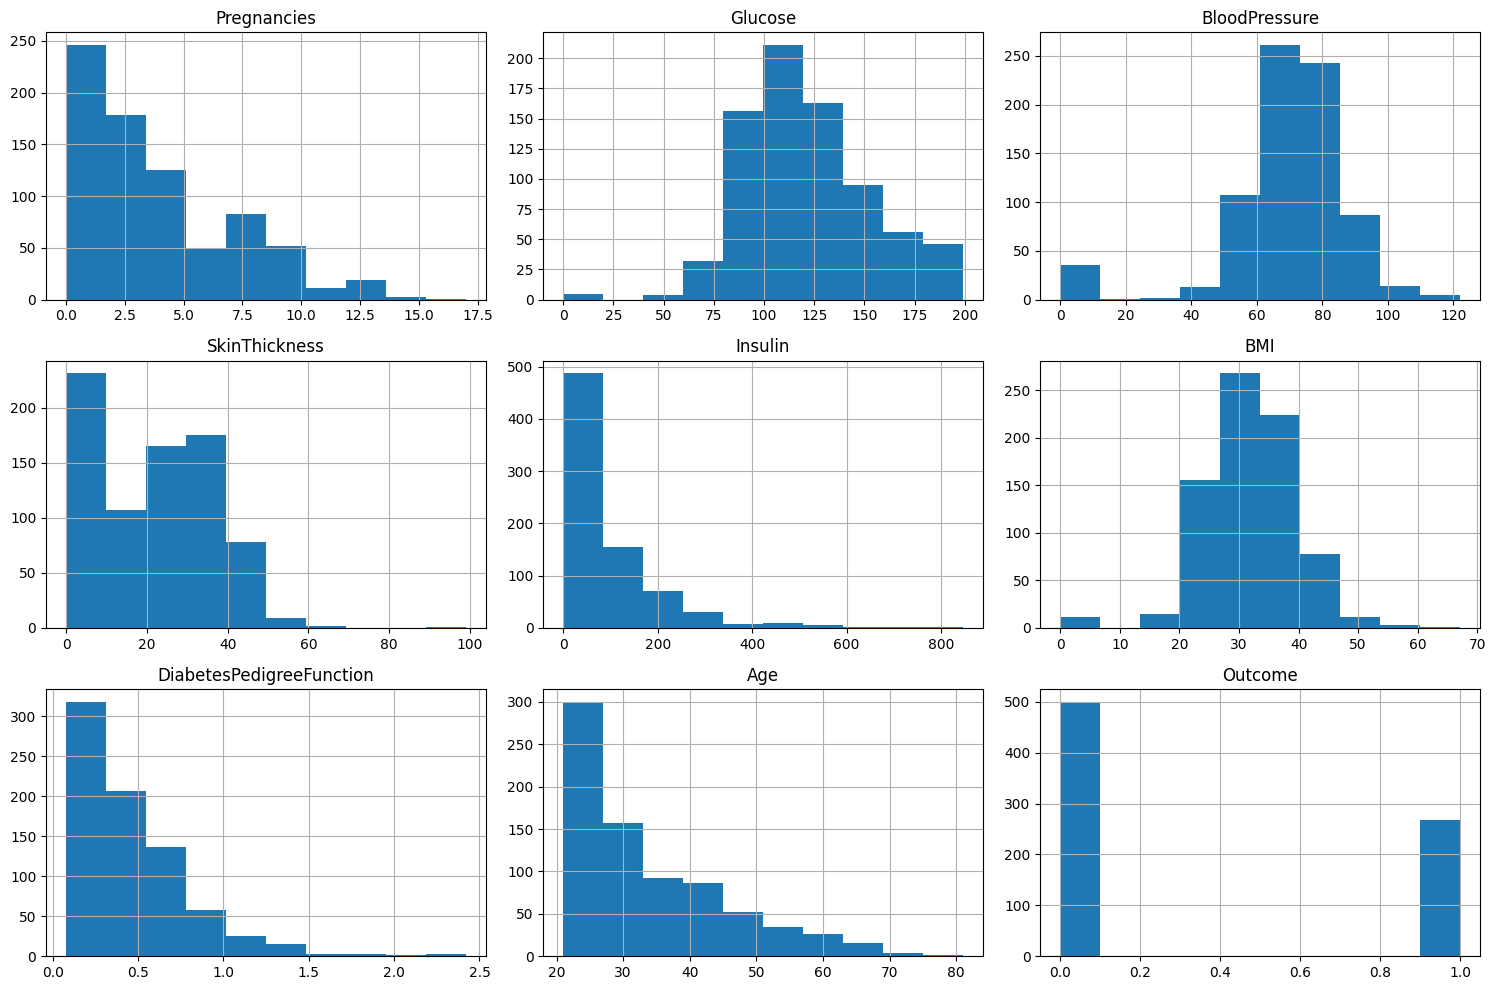

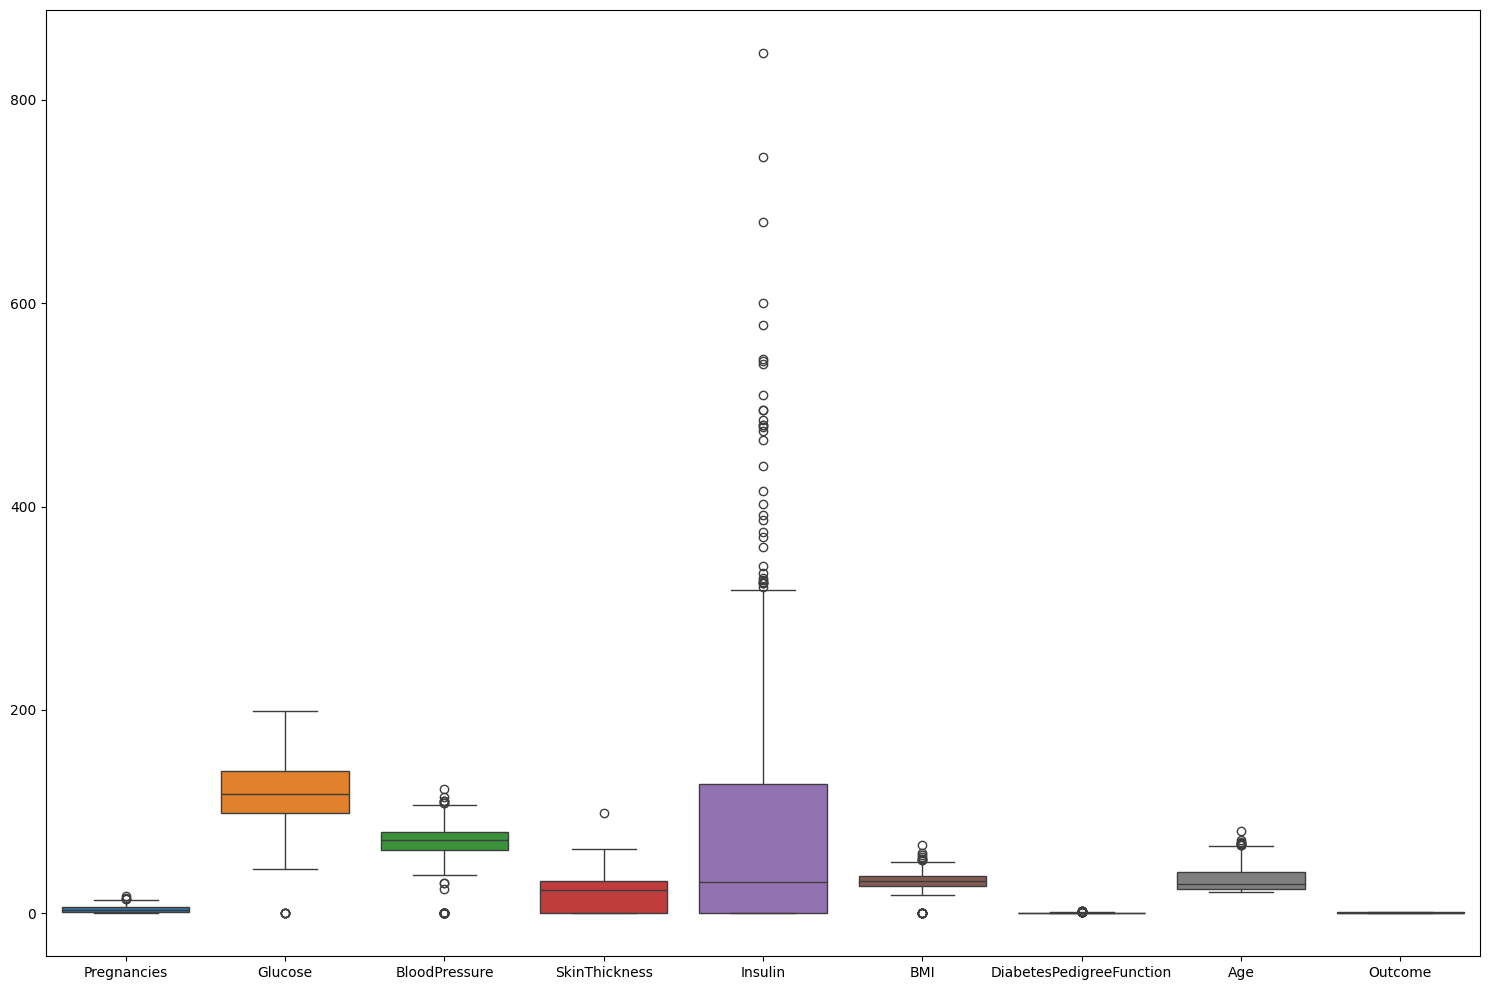

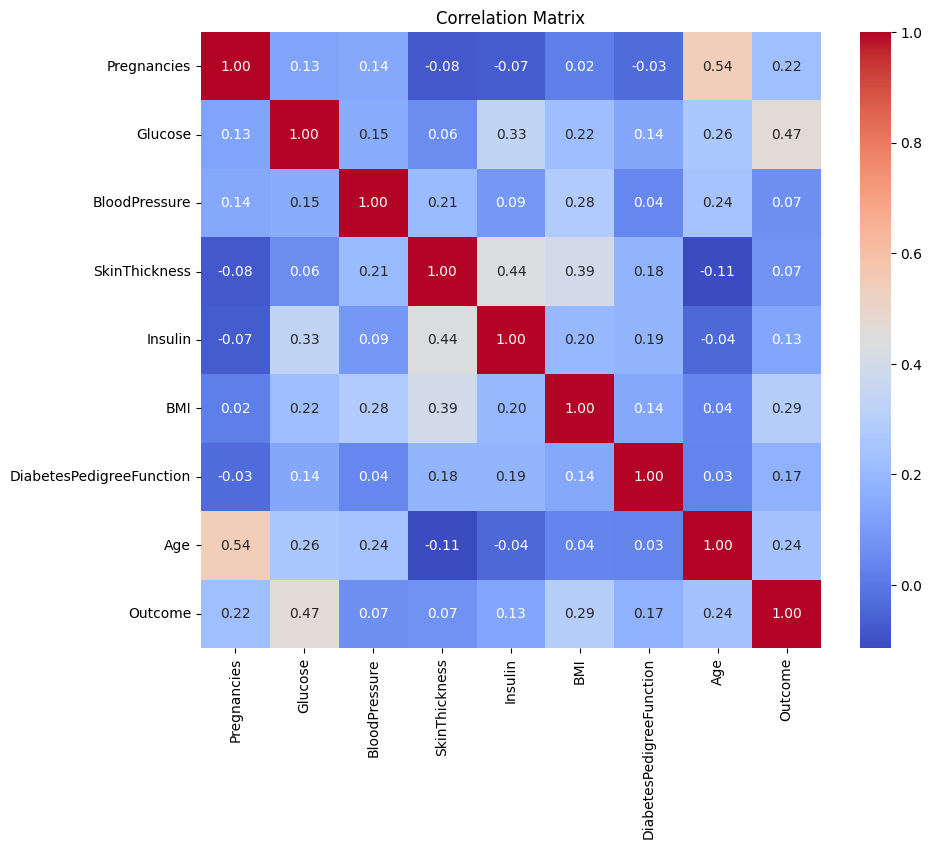

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


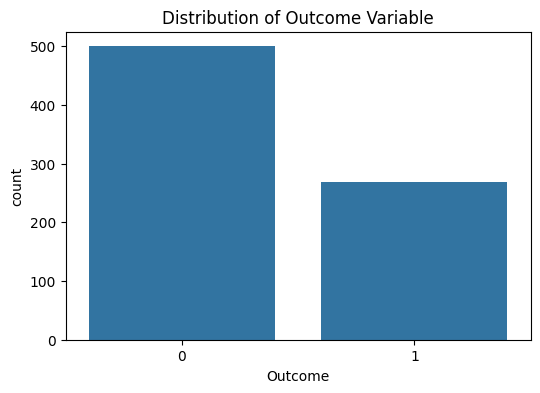

,count
Outcome,
0,500
1,268


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate descriptive statistics
display(df.describe())

# 2. Visualize the distribution of each numerical feature using histograms
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# 3. Create box plots for each numerical feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.tight_layout()
plt.show()

# 4. Calculate the correlation matrix
correlation_matrix = df.corr()

# 5. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 6. Check for missing values
display(df.isnull().sum())

# 7. Analyze the distribution of the target variable ('Outcome')
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome Variable')
plt.show()
display(df['Outcome'].value_counts())

## Preprocessing


Preprocess the data, including handling missing values, scaling features, and splitting the data into training and testing sets.



Implement the preprocessing steps including handling zero values, splitting data, and scaling features.



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Identify columns with potential missing values represented by zeros
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 2. Replace the zero values in the identified columns with the median
for col in zero_cols:
    df[col] = df[col].replace(0, df[col].median())

# 3. Separate the features (X) and the target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Instantiate a StandardScaler and fit it to the training features
scaler = StandardScaler()
scaler.fit(X_train)

# 6. Transform both the training and testing features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

display(X_train_scaled[:5])
display(X_test_scaled[:5])

array([[-0.52639686, -1.25688146, -0.01899526, -0.45487119, -0.61269674,
        -0.05024677, -0.49073479, -1.03594038],
       [ 1.58804586, -0.32605067,  0.8081742 , -0.34092141, -0.61269674,
        -0.59858988,  2.41502991,  1.48710085],
       [-0.82846011,  0.57153617, -2.16963585, -0.91067031, -0.12042886,
        -0.52643947,  0.54916055, -0.94893896],
       [-1.13052335,  1.30290323, -1.83876807, -0.45487119, -0.61269674,
        -1.50768503, -0.63929127,  2.79212217],
       [ 0.68185612,  0.40531639,  0.64274031,  1.14042573,  2.57063552,
         1.99882486, -0.68682934,  1.13909516]])

array([[ 0.68185612, -0.79146606, -1.1770325 ,  0.68462661,  0.88285995,
         0.23835487, -0.11637247,  0.87809089],
       [-0.52639686, -0.32605067,  0.22915558,  0.57067683, -0.61269674,
         0.48366626, -0.954231  , -1.03594038],
       [-0.52639686, -0.45902649, -0.68073083, -0.45487119, -0.61269674,
        -0.22340775, -0.9245197 , -1.03594038],
       [ 1.28598261, -0.49227045,  0.64274031, -0.45487119, -0.61269674,
        -1.11807282,  1.14932872,  0.0950781 ],
       [ 0.98391937,  0.4718043 ,  1.46990977, -0.45487119, -0.61269674,
        -0.35327849, -0.77002097,  1.48710085]])

## Feature engineering


Engineer new features from the existing ones, if necessary.



Analyze existing features and the problem domain to identify potential interactions or transformations that could create more informative features. Given the nature of the dataset, interaction terms between age and glucose/BMI might be relevant, as well as polynomial features for BMI and Glucose, which are known risk factors for diabetes. Create these features and add them to the training and testing datasets. Then, scale the new features using the previously fitted scaler.



In [28]:
# Feature Engineering
# Create interaction terms
X_train['Glucose_Age_Interaction'] = X_train['Glucose'] * X_train['Age']
X_test['Glucose_Age_Interaction'] = X_test['Glucose'] * X_test['Age']

X_train['BMI_Age_Interaction'] = X_train['BMI'] * X_train['Age']
X_test['BMI_Age_Interaction'] = X_test['BMI'] * X_test['Age']

# Create polynomial features for BMI and Glucose
X_train['BMI_squared'] = X_train['BMI']**2
X_test['BMI_squared'] = X_test['BMI']**2

X_train['Glucose_squared'] = X_train['Glucose']**2
X_test['Glucose_squared'] = X_test['Glucose']**2

# Re-instantiate and fit the scaler on the training data including the new features
scaler = StandardScaler()
scaler.fit(X_train)

# Transform both the training and testing features (including the new ones)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to dataframes for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Update X_train_scaled and X_test_scaled to be the dataframes
X_train_scaled = X_train_scaled_df
X_test_scaled = X_test_scaled_df

display(X_train_scaled.head())
display(X_test_scaled.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_Age_Interaction,BMI_Age_Interaction,BMI_squared,Glucose_squared
60,-0.526397,-1.256881,-0.018995,-0.454871,-0.612697,-0.050247,-0.490735,-1.035940,-1.137449,-0.933212,-0.144780,-1.096030
618,1.588046,-0.326051,0.808174,-0.340921,-0.612697,-0.598590,2.415030,1.487101,0.727305,0.818205,-0.615027,-0.403534
346,-0.828460,0.571536,-2.169636,-0.910670,-0.120429,-0.526439,0.549161,-0.948939,-0.508410,-1.029564,-0.556544,0.451612
294,-1.130523,1.302903,-1.838768,-0.454871,-0.612697,-1.507685,-0.639291,2.792122,3.092276,0.850244,-1.263847,1.284424
231,0.681856,0.405316,0.642740,1.140426,2.570636,1.998825,-0.686829,1.139095,1.001476,2.515514,2.137877,0.279372


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_Age_Interaction,BMI_Age_Interaction,BMI_squared,Glucose_squared
668,0.681856,-0.791466,-1.177033,0.684627,0.882860,0.238355,-0.116372,0.878091,0.053544,0.941612,0.126563,-0.774514
324,-0.526397,-0.326051,0.229156,0.570677,-0.612697,0.483666,-0.954231,-1.035940,-0.851611,-0.748815,0.370135,-0.403534
624,-0.526397,-0.459026,-0.680731,-0.454871,-0.612697,-0.223408,-0.924520,-1.035940,-0.892445,-0.993016,-0.299693,-0.514576
690,1.285983,-0.492270,0.642740,-0.454871,-0.612697,-1.118073,1.149329,0.095078,-0.226461,-0.543059,-1.005762,-0.541705
473,0.983919,0.471804,1.469910,-0.454871,-0.612697,-0.353278,-0.770021,1.487101,1.310648,1.019927,-0.411992,0.347511


## Logistic regression model


Build a logistic regression model for diabetes prediction.



Import the LogisticRegression class, instantiate the model, and fit it to the scaled training data and target.



In [29]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression model
model = LogisticRegression()

# Fit the logistic regression model to the scaled training data
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Evaluation


Evaluate the model using appropriate metrics like accuracy, precision, recall, F1-score, and ROC AUC.


Accuracy: 0.7468
Precision: 0.6481
Recall: 0.6364
F1-Score: 0.6422
ROC AUC: 0.8130


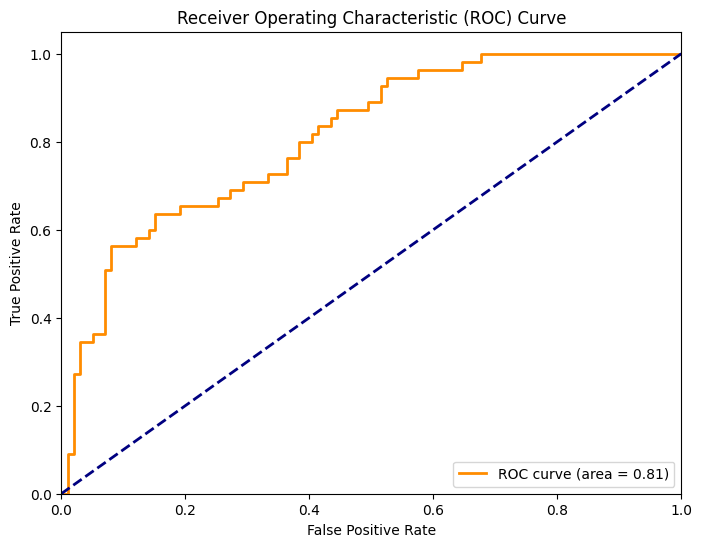

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Calibration





Calibrate the trained logistic regression model using isotonic regression on the scaled training data.



In [31]:
from sklearn.calibration import CalibratedClassifierCV

# Instantiate CalibratedClassifierCV with the trained model and isotonic method
# Remove the invalid 'cv='pretrain'' parameter
calibrated_model = CalibratedClassifierCV(model, method='isotonic')

# Fit the calibrated model to the scaled training data
calibrated_model.fit(X_train_scaled, y_train)

CalibratedClassifierCV(estimator=LogisticRegression(), method='isotonic')

## SHAP for explainability





Import the SHAP library, initialize a SHAP explainer for the calibrated model, and calculate SHAP values for the scaled test data.



In [23]:
import shap

# Initialize a SHAP explainer for the calibrated logistic regression model using the predict_proba method
explainer = shap.Explainer(calibrated_model.predict_proba, X_train_scaled)

# Calculate SHAP values for the scaled test data
shap_values = explainer(X_test_scaled)

PermutationExplainer explainer: 155it [00:21,  3.80it/s]


## Interpretation




Generate SHAP plots to interpret the model's predictions by visualizing overall feature importance, feature dependence, individual predictions, and detailed feature contributions for a specific instance.



/tmp/ipython-input-2781860089.py:18: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_positive_flat, X_test_scaled, feature_names=X_test_scaled.columns)


(154, 12, 2)


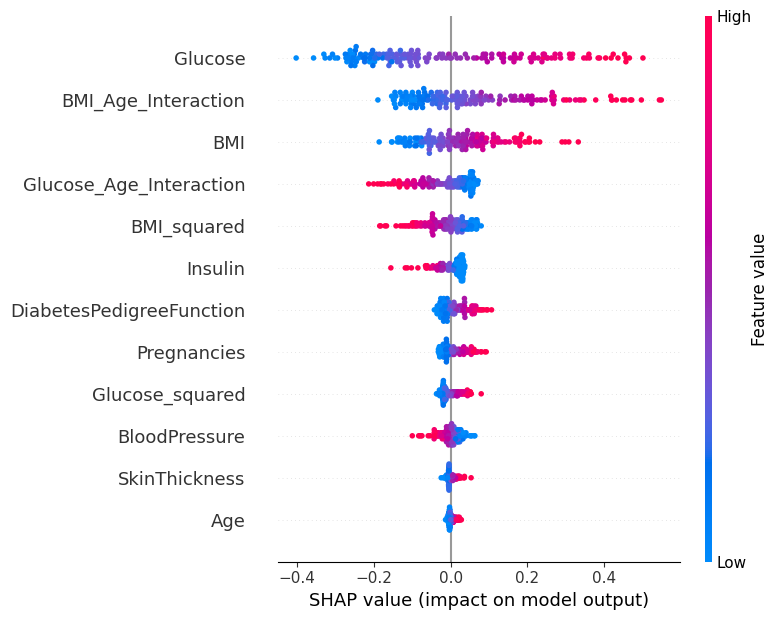

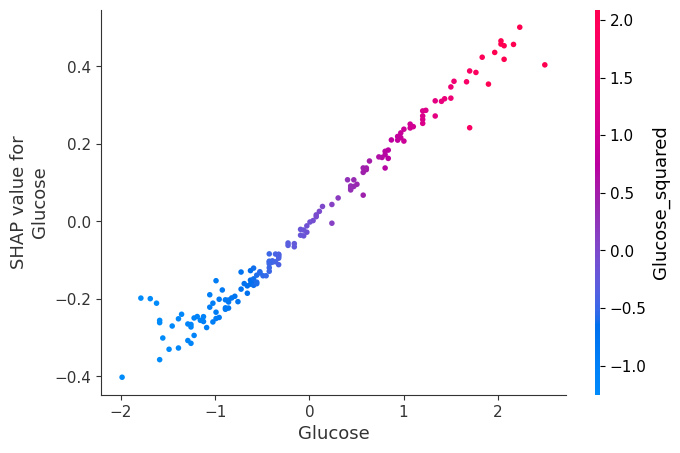

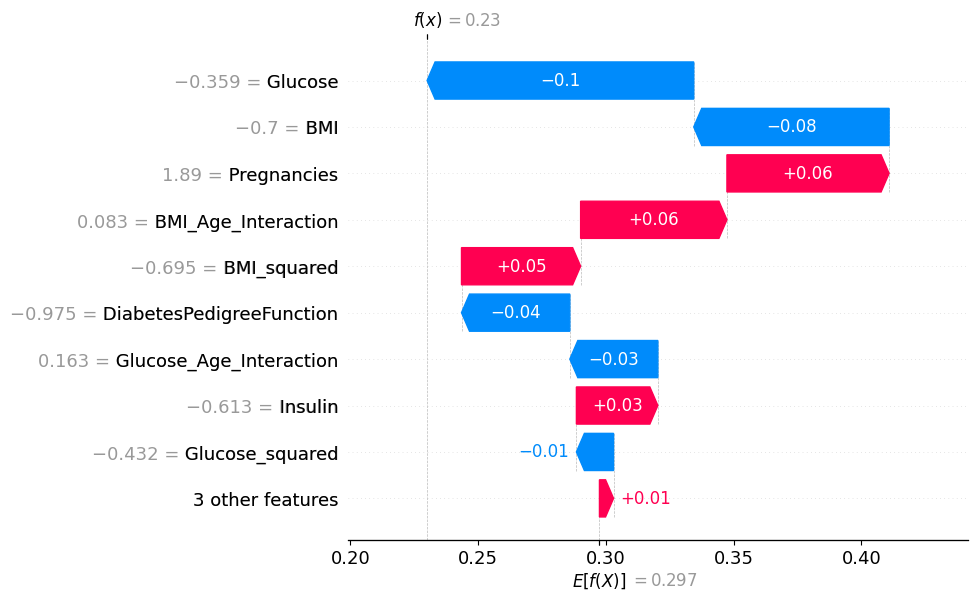

In [24]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Inspect the shape of shap_values
print(shap_values.shape)

# Access the SHAP values for the positive class (index 1)
shap_values_positive = shap_values[:, :, 1]

# Access the base value (expected value) for the positive class
expected_value_positive = shap_values.base_values[:, 1]

# Flatten shap_values_positive for plots that expect a 2D array
shap_values_positive_flat = shap_values_positive.values if hasattr(shap_values_positive, 'values') else shap_values_positive

# 1. Generate a summary plot of the SHAP values for the positive class
shap.summary_plot(shap_values_positive_flat, X_test_scaled, feature_names=X_test_scaled.columns)

# 2. Generate a dependence plot for a significant feature (e.g., Glucose)
# Use the flattened SHAP values for the positive class and explicitly pass feature names
shap.dependence_plot("Glucose", shap_values_positive_flat, X_test_scaled, feature_names=X_test_scaled.columns.tolist())

# 3. Generate force plots for a few individual predictions
# Choose an instance with a positive prediction (Outcome = 1) if available
positive_instance_index = y_test[y_test == 1].index[0]
positive_instance_loc = X_test_scaled.index.get_loc(positive_instance_index)
# Use the corresponding expected value for the positive instance
shap.force_plot(expected_value_positive[positive_instance_loc], shap_values_positive_flat[positive_instance_loc], X_test_scaled.iloc[positive_instance_loc], feature_names=X_test_scaled.columns.tolist())

# Choose an instance with a negative prediction (Outcome = 0) if available
negative_instance_index = y_test[y_test == 0].index[0]
negative_instance_loc = X_test_scaled.index.get_loc(negative_instance_index)
# Use the corresponding expected value for the negative instance
shap.force_plot(expected_value_positive[negative_instance_loc], shap_values_positive_flat[negative_instance_loc], X_test_scaled.iloc[negative_instance_loc], feature_names=X_test_scaled.columns.tolist())

# 4. Generate an individual SHAP values plot (waterfall plot) for a specific instance
# Use the SHAP values and base value for the positive class for the selected instance
shap.plots.waterfall(shap.Explanation(values=shap_values_positive_flat[positive_instance_loc],
                                      base_values=expected_value_positive[positive_instance_loc],
                                      data=X_test_scaled.iloc[positive_instance_loc].values,
                                      feature_names=X_test_scaled.columns.tolist()))